In [1]:
import numpy as np
from svm_classifier import svm, svm_angular, svm_with_different_Cs, angular_svm_with_different_Cs
from knn_classifier import k_nn
from time import time
import pandas as pd
from ctypes import *
import sys
from math import sqrt as sqrt
from numpy.ctypeslib import ndpointer 

lib = cdll.LoadLibrary("./lib_naive_.so")


class cross_validation_result(Structure):
    _fields_ = [    ("avg_accuracy", c_float),
                    ("min_accuracy", c_float),
                    ("max_accuracy", c_float),
                    ("accuracy_variance", c_float) ]
    def __init__(self):
        self.avg_accuracy = self.accuracy_variance = 0;
        self.min_accuracy = sys.float_info.max;
        self.max_accuracy = sys.float_info.min;
    
    def print_scores(self):
        print( "==========================================================" + "\n" 
                + "Naive bayes classification: " + "\n" 
                + "Minimum Accuracy: " + str(self.min_accuracy) + "\n"
                + "Average Accuracy: " + str(self.avg_accuracy) + "\n"
                + "Maximum Accuracy: " + str(self.max_accuracy) + "\n"
                + "Variance of Accuracy: " + str(self.accuracy_variance) + "\n"
                + "Standard Deviation of Accuracy: " + str(sqrt(self.accuracy_variance)) + "\n" 
                + "=========================================================="
        )



# Load spambase dataset
file_name = "spambase.data"
data = open(file_name, "r")
mailData = np.loadtxt(data, delimiter=",")
np.random.shuffle(mailData)


# MAIN:



# py_main = lib.py_main 
# py_main.argtypes = [(c_float * mailData.shape[0]) * mailData.shape[1]] 

# c_mail_data = np.array(mailData, dtype=np.float32)
# lib.py_main.restype = cross_validation_result
# start = time()
# naive_bayes_score = lib.py_main()
# end = time()
# naive_bayes_time = end - start


lib.py_main.restype = cross_validation_result
start = time()
naive_bayes_score = lib.py_main()
end = time()
naive_bayes_time = end - start


# naive_bayes_score.print_scores()

start = time()
# linear_score, poly_score, rbf_score = svm(mailData)
linear_scores, poly2_scores, rbf_scores = svm_with_different_Cs(mailData)
end = time()
svm_time = end - start
# print("\nTime elapsed for SVM: {}".format(end - start))

start = time()
# linear_norm_score, poly_norm_score, rbf_norm_score = svm_angular(mailData)
linear_norm_scores, poly_norm_scores, rbf_norm_scores = angular_svm_with_different_Cs(mailData)
end = time()
svm_norm_time = end - start
# print("\nTime elapsed for SVM Angular: {}".format(end - start))

start = time()
knn_score = k_nn(mailData)
end = time()
knn_time = end - start
# print("\nTime elapsed for K-NN: {}".format(end - start))


minimum_accuracy = [
    round(linear_scores[0][0].min() * 100,4),
    round(poly2_scores[0][0].min() * 100,4),
    round(rbf_scores[0][0].min() * 100,4),
    round(linear_scores[1][0].min() * 100,4),
    round(poly2_scores[1][0].min() * 100,4),
    round(rbf_scores[1][0].min() * 100,4),
    round(linear_scores[2][0].min() * 100,4),
    round(poly2_scores[2][0].min() * 100,4),
    round(rbf_scores[2][0].min() * 100,4),
    round(linear_scores[3][0].min() * 100,4),
    round(poly2_scores[3][0].min() * 100,4),
    round(rbf_scores[3][0].min() * 100,4),
    round(linear_scores[4][0].min() * 100,4),
    round(poly2_scores[4][0].min() * 100,4),
    round(rbf_scores[4][0].min() * 100,4),
    round(linear_norm_scores[0][0].min() * 100,4),
    round(poly_norm_scores[0][0].min() * 100,4),
    round(rbf_norm_scores[0][0].min() * 100,4),
    round(linear_norm_scores[1][0].min() * 100,4),
    round(poly_norm_scores[1][0].min() * 100,4),
    round(rbf_norm_scores[1][0].min() * 100,4),
    round(linear_norm_scores[2][0].min() * 100,4),
    round(poly_norm_scores[2][0].min() * 100,4),
    round(rbf_norm_scores[2][0].min() * 100,4),
    round(linear_norm_scores[3][0].min() * 100,4),
    round(poly_norm_scores[3][0].min() * 100,4),
    round(rbf_norm_scores[3][0].min() * 100,4),
    round(linear_norm_scores[4][0].min() * 100,4),
    round(poly_norm_scores[4][0].min() * 100,4),
    round(rbf_norm_scores[4][0].min() * 100,4),
    round(knn_score.min() * 100,4),
    round(naive_bayes_score.min_accuracy * 100,4) 
]
average_accuracy = [
    round(linear_scores[0][0].mean() * 100,4),
    round(poly2_scores[0][0].mean() * 100,4),
    round(rbf_scores[0][0].mean() * 100,4),
    round(linear_scores[1][0].mean() * 100,4),
    round(poly2_scores[1][0].mean() * 100,4),
    round(rbf_scores[1][0].mean() * 100,4),
    round(linear_scores[2][0].mean() * 100,4),
    round(poly2_scores[2][0].mean() * 100,4),
    round(rbf_scores[2][0].mean() * 100,4),
    round(linear_scores[3][0].mean() * 100,4),
    round(poly2_scores[3][0].mean() * 100,4),
    round(rbf_scores[3][0].mean() * 100,4),
    round(linear_scores[4][0].mean() * 100,4),
    round(poly2_scores[4][0].mean() * 100,4),
    round(rbf_scores[4][0].mean() * 100,4),
    round(linear_norm_scores[0][0].mean() * 100,4),
    round(poly_norm_scores[0][0].mean() * 100,4),
    round(rbf_norm_scores[0][0].mean() * 100,4),
    round(linear_norm_scores[1][0].mean() * 100,4),
    round(poly_norm_scores[1][0].mean() * 100,4),
    round(rbf_norm_scores[1][0].mean() * 100,4),
    round(linear_norm_scores[2][0].mean() * 100,4),
    round(poly_norm_scores[2][0].mean() * 100,4),
    round(rbf_norm_scores[2][0].mean() * 100,4),
    round(linear_norm_scores[3][0].mean() * 100,4),
    round(poly_norm_scores[3][0].mean() * 100,4),
    round(rbf_norm_scores[3][0].mean() * 100,4),
    round(linear_norm_scores[4][0].mean() * 100,4),
    round(poly_norm_scores[4][0].mean() * 100,4),
    round(rbf_norm_scores[4][0].mean() * 100,4),
    round(knn_score.mean() * 100,4),
    round(naive_bayes_score.avg_accuracy * 100,4)
]
maximum_accuracy = [
    round(linear_scores[0][0].max() * 100, 4),
    round(poly2_scores[0][0].max() * 100, 4),
    round(rbf_scores[0][0].max() * 100, 4),
    round(linear_scores[1][0].max() * 100, 4),
    round(poly2_scores[1][0].max() * 100, 4),
    round(rbf_scores[1][0].max() * 100, 4),
    round(linear_scores[2][0].max() * 100, 4),
    round(poly2_scores[2][0].max() * 100, 4),
    round(rbf_scores[2][0].max() * 100, 4),
    round(linear_scores[3][0].max() * 100, 4),
    round(poly2_scores[3][0].max() * 100, 4),
    round(rbf_scores[3][0].max() * 100, 4),
    round(linear_scores[4][0].max() * 100, 4),
    round(poly2_scores[4][0].max() * 100, 4),
    round(rbf_scores[4][0].max() * 100, 4),
    round(linear_norm_scores[0][0].max() * 100, 4),
    round(poly_norm_scores[0][0].max() * 100, 4),
    round(rbf_norm_scores[0][0].max() * 100, 4),
    round(linear_norm_scores[1][0].max() * 100, 4),
    round(poly_norm_scores[1][0].max() * 100, 4),
    round(rbf_norm_scores[1][0].max() * 100, 4),
    round(linear_norm_scores[2][0].max() * 100, 4),
    round(poly_norm_scores[2][0].max() * 100, 4),
    round(rbf_norm_scores[2][0].max() * 100, 4),
    round(linear_norm_scores[3][0].max() * 100, 4),
    round(poly_norm_scores[3][0].max() * 100, 4),
    round(rbf_norm_scores[3][0].max() * 100, 4),
    round(linear_norm_scores[4][0].max() * 100, 4),
    round(poly_norm_scores[4][0].max() * 100, 4),
    round(rbf_norm_scores[4][0].max() * 100, 4),
    round(knn_score.max() * 100,4),
    round(naive_bayes_score.max_accuracy * 100,4) 
]

support_vectors_numbers = [
    linear_scores[0][1],
    poly2_scores[0][1],
    rbf_scores[0][1],

    linear_scores[1][1],
    poly2_scores[1][1],
    rbf_scores[1][1],

    linear_scores[2][1],
    poly2_scores[2][1],
    rbf_scores[2][1],

    linear_scores[3][1],
    poly2_scores[3][1],
    rbf_scores[3][1],

    linear_scores[4][1],
    poly2_scores[4][1],
    rbf_scores[4][1],
    
    linear_norm_scores[0][1],
    poly_norm_scores[0][1],
    rbf_norm_scores[0][1],

    linear_norm_scores[1][1],
    poly_norm_scores[1][1],
    rbf_norm_scores[1][1],

    linear_norm_scores[2][1],
    poly_norm_scores[2][1],
    rbf_norm_scores[2][1],

    linear_norm_scores[3][1],
    poly_norm_scores[3][1],
    rbf_norm_scores[3][1],

    linear_norm_scores[4][1],
    poly_norm_scores[4][1],
    rbf_norm_scores[4][1],

    '',
    '' 
]
elapsed_time = [
    round(linear_scores[0][2],4),
    round(poly2_scores[0][2],4),
    round(rbf_scores[0][2],4),
    round(linear_scores[2][2],4),
    round(poly2_scores[2][2],4),
    round(rbf_scores[2][2],4),
    round(linear_scores[2][2],4),
    round(poly2_scores[2][2],4),
    round(rbf_scores[2][2],4),
    round(linear_scores[3][2],4),
    round(poly2_scores[3][2],4),
    round(rbf_scores[3][2],4),
    round(linear_scores[4][2],4),
    round(poly2_scores[4][2],4),
    round(rbf_scores[4][2],4),

    round(linear_norm_scores[0][2], 4),
    round(poly_norm_scores[0][2], 4),
    round(rbf_norm_scores[0][2], 4),
    round(linear_norm_scores[1][2], 4),
    round(poly_norm_scores[1][2], 4),
    round(rbf_norm_scores[1][2], 4),
    round(linear_norm_scores[2][2], 4),
    round(poly_norm_scores[2][2], 4),
    round(rbf_norm_scores[2][2], 4),
    round(linear_norm_scores[3][2], 4),
    round(poly_norm_scores[3][2], 4),
    round(rbf_norm_scores[3][2], 4),
    round(linear_norm_scores[4][2], 4),
    round(poly_norm_scores[4][2], 4),
    round(rbf_norm_scores[4][2], 4),
    
    round(knn_time, 4),
    round(naive_bayes_time, 4)
]
variance_of_accuracy= [
    linear_scores[0][0].var(),
    poly2_scores[0][0].var(),
    rbf_scores[0][0].var(),

    linear_scores[1][0].var(),
    poly2_scores[1][0].var(),
    rbf_scores[1][0].var(),

    linear_scores[2][0].var(),
    poly2_scores[2][0].var(),
    rbf_scores[2][0].var(),

    linear_scores[3][0].var(),
    poly2_scores[3][0].var(),
    rbf_scores[3][0].var(),

    linear_scores[4][0].var(),
    poly2_scores[4][0].var(),
    rbf_scores[4][0].var(),
    
    linear_norm_scores[0][0].var(),
    poly_norm_scores[0][0].var(),
    rbf_norm_scores[0][0].var(),

    linear_norm_scores[1][0].var(),
    poly_norm_scores[1][0].var(),
    rbf_norm_scores[1][0].var(),

    linear_norm_scores[2][0].var(),
    poly_norm_scores[2][0].var(),
    rbf_norm_scores[2][0].var(),

    linear_norm_scores[3][0].var(),
    poly_norm_scores[3][0].var(),
    rbf_norm_scores[3][0].var(),

    linear_norm_scores[4][0].var(),
    poly_norm_scores[4][0].var(),
    rbf_norm_scores[4][0].var(),
    
    knn_score.var(),
    naive_bayes_score.accuracy_variance]
std_of_accuracy = [
    linear_scores[0][0].std(),
    poly2_scores[0][0].std(),
    rbf_scores[0][0].std(),

    linear_scores[1][0].std(),
    poly2_scores[1][0].std(),
    rbf_scores[1][0].std(),

    linear_scores[2][0].std(),
    poly2_scores[2][0].std(),
    rbf_scores[2][0].std(),

    linear_scores[3][0].std(),
    poly2_scores[3][0].std(),
    rbf_scores[3][0].std(),

    linear_scores[4][0].std(),
    poly2_scores[4][0].std(),
    rbf_scores[4][0].std(),

    linear_norm_scores[0][0].std(),
    poly_norm_scores[0][0].std(),
    rbf_norm_scores[0][0].std(),

    linear_norm_scores[1][0].std(),
    poly_norm_scores[1][0].std(),
    rbf_norm_scores[1][0].std(),

    linear_norm_scores[2][0].std(),
    poly_norm_scores[2][0].std(),
    rbf_norm_scores[2][0].std(),

    linear_norm_scores[3][0].std(),
    poly_norm_scores[3][0].std(),
    rbf_norm_scores[3][0].std(),

    linear_norm_scores[4][0].std(),
    poly_norm_scores[4][0].std(),
    rbf_norm_scores[4][0].std(),

    knn_score.std(),
    sqrt(naive_bayes_score.accuracy_variance)]
index = [
    "Linear SVM with C = 1",
    "2-degree Poly SVM C = 1",
    "RBF SVM C = 1",

    "Linear SVM C = 25",
    "2-degree Poly SVM C = 25",
    "RBF SVM C = 25",

    "Linear SVM C = 50",
    "2-degree Poly SVM C = 50",
    "RBF SVM C = 50",

    "Linear SVM C = 75",
    "2-degree Poly SVM C = 75",
    "RBF SVM C = 75",
 
    "Linear SVM C = 100",
    "2-degree Poly SVM C = 100",
    "RBF SVM C = 100",

    "Norm Linear SVM with C = 1",
    "Norm 2-degree Poly SVM C = 1",
    "Norm RBF SVM C = 1",

    "Norm Linear SVM C = 25",
    "Norm 2-degree Poly SVM C = 25",
    "Norm RBF SVM C = 25",

    "Norm Linear SVM C = 50",
    "Norm 2-degree Poly SVM C = 50",
    "Norm RBF SVM C = 50",

    "Norm Linear SVM C = 75",
    "Norm 2-degree Poly SVM C = 75",
    "Norm RBF SVM C = 75",
 
    "Norm Linear SVM C = 100",
    "Norm 2-degree Poly SVM C = 100",
    "Norm RBF SVM C = 100",
    
    "KNN",
    "NAIVE BAYES"
]

dfTable = pd.DataFrame(
    {
        "Minimum Accuracy": minimum_accuracy,
        "Average Accuracy": average_accuracy,
        "Maximum Accuracy": maximum_accuracy,
        "Variance of Accuracy": variance_of_accuracy,
        "Standard deviation of Accuracy": std_of_accuracy,
        "Elapsed time": elapsed_time,
        "Number of vectors" : support_vectors_numbers
    },
    index=index
)

dfTable.sort_values(by=['Average Accuracy'])



,Minimum Accuracy,Average Accuracy,Maximum Accuracy,Variance of Accuracy,Standard deviation of Accuracy,Elapsed time,Number of vectors
Linear SVM with C = 1,60.4348,60.8128,61.0870,0.000004,0.002001,4.5475,"[1289, 1285]"
2-degree Poly SVM C = 1,79.3478,81.1780,84.3478,0.000237,0.015382,8.6696,"[1016, 1011]"
NAIVE BAYES,81.9172,85.0580,87.7996,0.002774,0.052665,0.0537,
Linear SVM C = 25,83.4783,87.1547,90.8696,0.000429,0.020719,3.0737,"[1077, 1078]"
Linear SVM C = 50,84.7826,88.5674,91.5217,0.000388,0.019706,3.0737,"[902, 901]"
2-degree Poly SVM C = 25,86.3043,89.5890,92.6087,0.000440,0.020983,5.6396,"[590, 555]"
Linear SVM C = 75,86.5217,89.6975,92.3913,0.000444,0.021075,2.7872,"[815, 814]"
Linear SVM C = 100,86.9565,90.1756,93.0435,0.000424,0.020590,2.4386,"[761, 759]"
2-degree Poly SVM C = 50,87.6087,90.3932,93.0435,0.000336,0.018320,5.6396,"[539, 495]"
KNN,88.9130,91.0670,92.3913,0.000107,0.010321,0.7359,


Now follows the graphical comparison:

(0.0, 100.0)

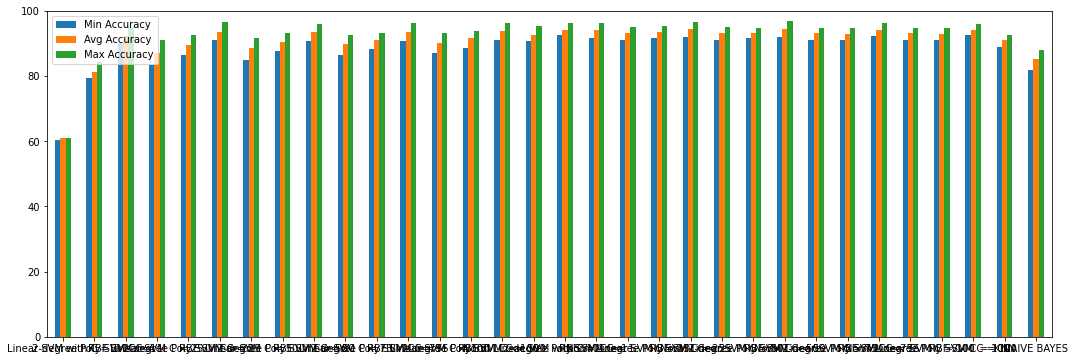

In [2]:
# minimum_accuracy = [
#     linear_score.min() * 100,
#     poly_score.min() * 100,
#     rbf_score.min() * 100,
#     linear_norm_score.min() * 100,
#     poly_norm_score.min() * 100,
#     rbf_norm_score.min() * 100,
#     knn_score.min() * 100,
#     naive_bayes_score.min_accuracy * 100 
# ]
# average_accuracy = [
#     linear_score.mean() * 100,
#     poly_score.mean() * 100,
#     rbf_score.mean() * 100,
#     linear_norm_score.mean() * 100,
#     poly_norm_score.mean() * 100,
#     rbf_norm_score.mean() * 100,
#     knn_score.mean() * 100,
#     naive_bayes_score.avg_accuracy * 100
# ]
# maximum_accuracy = [
#     linear_score.max() * 100,
#     poly_score.max() * 100,
#     rbf_score.max() * 100,
#     linear_norm_score.max() * 100,
#     poly_norm_score.max() * 100,
#     rbf_norm_score.max() * 100,
#     knn_score.max() * 100,
#     naive_bayes_score.max_accuracy * 100 
# ]
# index = [
#     "Linear SVM",
#     "2-degree Poly SVM",
#     "RBF SVM",
#     "Linear Norm SVM",
#     "2-degree Poly Norm SVM",
#     "RBF Norm SVM",
#     "KNN",
#     "NAIVE BAYES"
# ]
df = pd.DataFrame(
    {
        "Min Accuracy": minimum_accuracy,
        "Avg Accuracy": average_accuracy,
        "Max Accuracy": maximum_accuracy,
    },
    index=index
)


ax = df.plot.bar(rot=0, figsize=(18,6))
ax.set_ylim(0, 100)